In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pydataset

from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

import acquire as a
import prepare as pre

## Acquire Data

In [6]:
df = pd.read_csv('cars.csv')

In [8]:
df.head()

,Id,Price,Year,Mileage,City,State,Vin,Make,Model
0,1,16472,2015,18681,Jefferson City,MO,KL4CJBSBXFB267643,Buick,EncoreConvenience
1,2,15749,2015,27592,Highland,IN,KL4CJASB5FB245057,Buick,EncoreFWD
2,3,16998,2015,13650,Boone,NC,KL4CJCSB0FB264921,Buick,EncoreLeather
3,4,15777,2015,25195,New Orleans,LA,KL4CJASB4FB217542,Buick,EncoreFWD
4,5,16784,2015,22800,Las Vegas,NV,KL4CJBSB3FB166881,Buick,EncoreConvenience


In [7]:
a.summarize(df)

Dataframe shape: 
(297899, 9)
Dataframe head: 
   Id  Price  Year  Mileage            City State                Vin   Make  \
0   1  16472  2015    18681  Jefferson City    MO  KL4CJBSBXFB267643  Buick   
1   2  15749  2015    27592        Highland    IN  KL4CJASB5FB245057  Buick   
2   3  16998  2015    13650           Boone    NC  KL4CJCSB0FB264921  Buick   

               Model  
0  EncoreConvenience  
1          EncoreFWD  
2      EncoreLeather  
Dataframe info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297899 entries, 0 to 297898
Data columns (total 9 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   Id       297899 non-null  int64 
 1   Price    297899 non-null  int64 
 2   Year     297899 non-null  int64 
 3   Mileage  297899 non-null  int64 
 4   City     297899 non-null  object
 5   State    297899 non-null  object
 6   Vin      297899 non-null  object
 7   Make     297899 non-null  object
 8   Model    297899 non-null  object

## Prepare

In [10]:
pre.miss_dup_values(df)

Your selected dataframe has 9 columns.
There are 0 columns that have missing values.
  
** There are 0 duplicate rows that represents 0.0% of total Values**


,Missing Values,% of Total Values


In [17]:
#lowercase the name of the columns
df.columns = df.columns.str.lower()


In [19]:
#set id as index
df.set_index('id', inplace=True)


In [20]:
df.head(1)

,price,year,mileage,city,state,vin,make,model
id,,,,,,,,
1,16472,2015,18681,Jefferson City,MO,KL4CJBSBXFB267643,Buick,EncoreConvenience


We'll construct a feature that says whether the car sold for over the average price for the car's make, model, and year:

In [24]:
df['avg_saleprice'] = df.groupby(['year', 'make', 'model']).price.transform('mean')
df['gt_avg'] = (df.price > df.avg_saleprice).astype(int)

We'll remove the features we aren't going to use:

In [25]:
df.drop(columns=['price', 'city', 'vin', 'avg_saleprice'], inplace=True)

In [26]:
df.head()

,year,mileage,state,make,model,gt_avg
id,,,,,,
1,2015,18681,MO,Buick,EncoreConvenience,0
2,2015,27592,IN,Buick,EncoreFWD,0
3,2015,13650,NC,Buick,EncoreLeather,0
4,2015,25195,LA,Buick,EncoreFWD,0
5,2015,22800,NV,Buick,EncoreConvenience,0


Let's encode the categorical columns:

In [27]:
from sklearn.preprocessing import LabelEncoder

In [28]:
df.year.value_counts()

2014    57700
2015    53490
2016    40818
2017    30297
2013    26022
2012    18205
2011    15845
2010    10807
2008     9828
2007     7975
2009     7242
2006     5778
2005     4194
2004     3050
2003     2038
2002     1421
2001      998
2000      730
2018      461
1999      455
1998      327
1997      218
Name: year, dtype: int64

In [ ]:
#What LabelEncoder() does

In [30]:
le = LabelEncoder().fit(df['year'])
le

LabelEncoder()

In [32]:
df['year']=le.transform(df['year'])

In [33]:
df.year.value_counts()

17    57700
18    53490
19    40818
20    30297
16    26022
15    18205
14    15845
13    10807
11     9828
10     7975
12     7242
9      5778
8      4194
7      3050
6      2038
5      1421
4       998
3       730
21      461
2       455
1       327
0       218
Name: year, dtype: int64

In [34]:
#lets encode  the categorical columns
for col in ['state', 'make', 'model', 'year']:
    le = LabelEncoder().fit(df[col])
    df[col] = le.transform(df[col])

In [35]:
df.head()

,year,mileage,state,make,model,gt_avg
id,,,,,,
1,18,18681,28,7,523,0
2,18,27592,19,7,525,0
3,18,13650,32,7,526,0
4,18,25195,22,7,525,0
5,18,22800,38,7,523,0


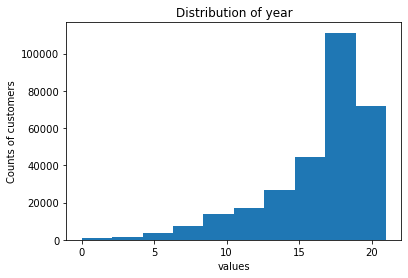

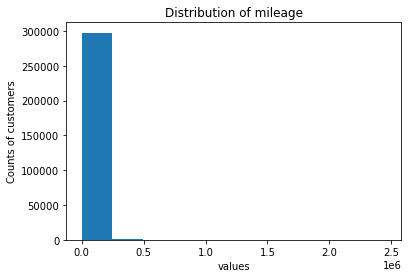

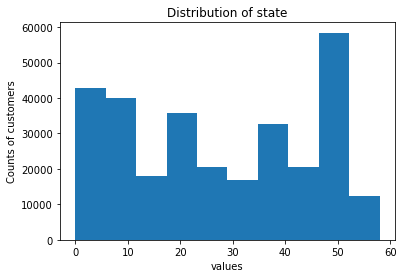

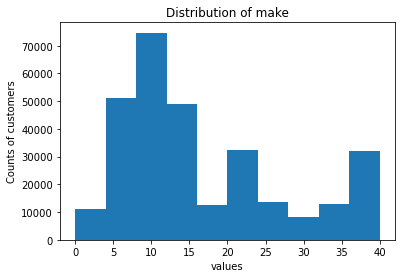

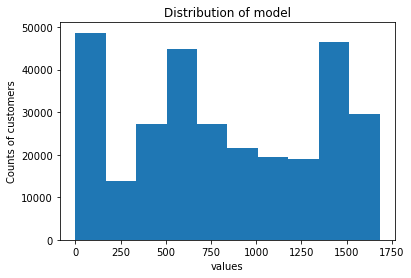

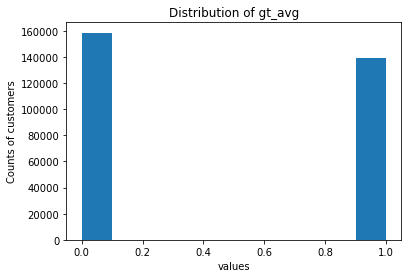

In [36]:
pre.distribution(df)

## Split 
